In [1]:
import pandas as pd
import numpy as np
import os 
os.chdir('D:\CampusX\Data')

In [2]:
courses = pd.read_csv('courses.csv')
students = pd.read_csv('students.csv')
nov = pd.read_csv('reg-month1.csv')
dec = pd.read_csv('reg-month2.csv')

matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
dec

,student_id,course_id
0,3,5
1,16,7
2,12,10
3,12,1
4,14,9
5,7,7
6,7,2
7,16,3
8,17,10
9,11,8


In [ ]:
# pd.concat
# df.concat
# ignore_index
# df.append
# mullitindex -> fetch using iloc
# concat dataframes horizontally

In [10]:
regs = pd.concat([nov,dec], ignore_index=True) # always keep true
# regs = pd.concat([nov,dec])
nov.shape, dec.shape

((25, 2), (28, 2))

In [9]:
pd.concat([nov, dec], ignore_index=True).tail()

,student_id,course_id
48,14,1
49,11,10
50,42,9
51,50,8
52,38,1


In [11]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])

multi.tail()

student_id  course_id
Dec 23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [13]:
multi.index[:5]

MultiIndex([('Nov', 0),
            ('Nov', 1),
            ('Nov', 2),
            ('Nov', 3),
            ('Nov', 4)],
           )

In [14]:
# Multiindex DataFrame
multi.loc[('Dec',4)]

student_id    14
course_id      9
Name: (Dec, 4), dtype: int64

In [15]:
pd.concat([nov,dec], axis=1).tail() # different number of rows but we can still append

,student_id,course_id,student_id,course_id
23,25.0,10.0,14,1
24,3.0,3.0,11,10
25,NaN,NaN,42,9
26,NaN,NaN,50,8
27,NaN,NaN,38,1


In [16]:
students.shape, regs.shape

((25, 3), (53, 2))

In [17]:
# inner join
merged_df = students.merge(regs, how='inner', on='student_id')
merged_df.shape

(50, 4)

In [18]:
# left join
courses.merge(regs,how='left',on='course_id').tail()

,course_id,course_name,price,student_id
50,10,pyspark,2499,17.0
51,10,pyspark,2499,1.0
52,10,pyspark,2499,11.0
53,11,Numpy,699,NaN
54,12,C++,1299,NaN


In [19]:
# right join
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Nitish','Ankit','Rahul'],
    'partner':[28,26,17]
})

students = pd.concat([students,temp_df],ignore_index=True)

In [20]:
students.tail()

,student_id,name,partner
23,24,Radhika Suri,17
24,25,Shashank D’Alia,2
25,26,Nitish,28
26,27,Ankit,26
27,28,Rahul,17


In [21]:
students.merge(regs,how='right',on='student_id').head()

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9


In [22]:
regs.merge(students,how='left',on='student_id').head()

,student_id,course_id,name,partner
0,23,1,Chhavi Lachman,18.0
1,15,5,Preet Sha,16.0
2,18,6,Fardeen Mahabir,13.0
3,23,4,Chhavi Lachman,18.0
4,16,9,Elias Dodiya,25.0


In [23]:
# outer join
students.merge(regs,how='outer',on='student_id').tail(5)

,student_id,name,partner,course_id
58,27,Ankit,26.0,NaN
59,28,Rahul,17.0,NaN
60,42,NaN,NaN,9.0
61,50,NaN,NaN,8.0
62,38,NaN,NaN,1.0


In [24]:
# 1. find total revenue generated
total = regs.merge(courses,how='inner',on='course_id')['price'].sum()
total

154247

In [25]:
# 2. find month by month revenue
temp_df = pd.concat([nov,dec],keys=['Nov','Dec']).reset_index()
print(temp_df.tail())
temp_df.merge(courses,on='course_id').groupby('level_0')['price'].sum()

   level_0  level_1  student_id  course_id
48     Dec       23          14          1
49     Dec       24          11         10
50     Dec       25          42          9
51     Dec       26          50          8
52     Dec       27          38          1


level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

In [26]:
# 3. Print the registration table
# cols -> name -> course -> price
regs.merge(students,on='student_id').merge(courses,on='course_id')[['name','course_name','price']].head()

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,python,2499
2,Fardeen Mahabir,python,2499
3,Kailash Harjo,python,2499
4,Seema Kota,python,2499


<AxesSubplot:xlabel='course_name'>

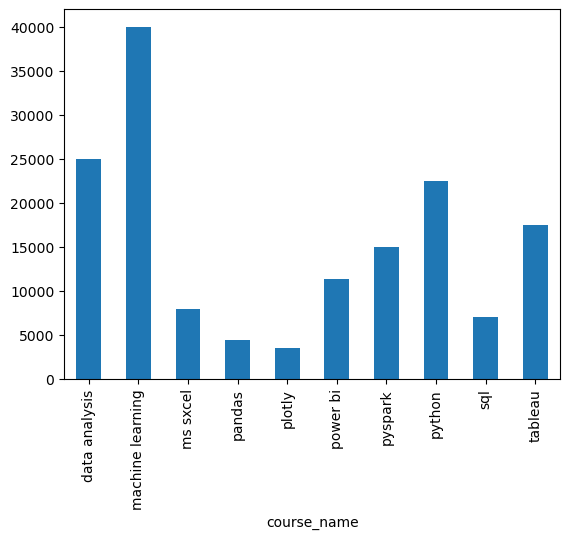

In [27]:
# 4. Plot bar chart for revenue/course
regs.merge(courses,on='course_id').groupby('course_name').sum()['price'].plot(kind='bar')

In [28]:
# 5. find students who enrolled in both the months
common_student_id = np.intersect1d(nov['student_id'],dec['student_id'])
common_student_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23], dtype=int64)

In [29]:
students[students['student_id'].isin(common_student_id)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [30]:
# 6. find course that got no enrollment
# courses['course_id']
# regs['course_id']

course_id_list = np.setdiff1d(courses['course_id'],regs['course_id'])
courses[courses['course_id'].isin(course_id_list)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [31]:
# 7. find students who did not enroll into any courses
student_id_list = np.setdiff1d(students['student_id'],regs['student_id'])
students[students['student_id'].isin(student_id_list)].shape[0]

(10/28)*100

35.714285714285715

In [32]:
students.head(2)

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1


In [33]:
# 8. Print student name -> partner name for all enrolled students
# self join
students.merge(students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']].head()

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor


In [34]:
# 9. find top 3 students who did most number enrollments
regs.merge(students,on='student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: name, dtype: int64

In [35]:
# 10. find top 3 students who spent most amount of money on courses
regs.merge(students,on='student_id').merge(courses,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

In [36]:
# Alternate syntax for merge
# students.merge(regs)

pd.merge(students,regs,how='inner',on='student_id').head()

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5


In [ ]:
# IPL Problems

# find top 3 studiums with highest sixes/match ratio
# find orange cap holder of all the seasons

In [38]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [39]:
delivery.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [40]:
temp_df = delivery.merge(matches,left_on='match_id',right_on='id')

In [41]:
six_df = temp_df[temp_df['batsman_runs'] == 6]

In [42]:
# stadium -> sixes
num_sixes = six_df.groupby('venue')['venue'].count()

In [43]:
num_matches = matches['venue'].value_counts()

In [46]:
num_sixes.head(3)

venue
Barabati Stadium      68
Brabourne Stadium    114
Buffalo Park          27
Name: venue, dtype: int64

In [44]:
(num_sixes/num_matches).sort_values(ascending=False).head(10)

Holkar Cricket Stadium                                 17.600000
M Chinnaswamy Stadium                                  13.227273
Sharjah Cricket Stadium                                12.666667
Himachal Pradesh Cricket Association Stadium           12.000000
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    11.727273
Wankhede Stadium                                       11.526316
De Beers Diamond Oval                                  11.333333
Maharashtra Cricket Association Stadium                11.266667
JSCA International Stadium Complex                     10.857143
Sardar Patel Stadium, Motera                           10.833333
Name: venue, dtype: float64

In [47]:
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


In [48]:
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False)

,season,batsman,batsman_runs
1383,2016,V Kohli,973
1278,2016,DA Warner,848
910,2013,MEK Hussey,733
684,2012,CH Gayle,733
852,2013,CH Gayle,720
...,...,...,...
1467,2017,MM Patel,0
658,2012,AC Blizzard,0
475,2011,AB Dinda,0
1394,2017,AD Nath,0
